In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gstools as gs


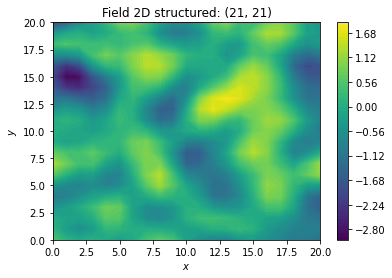

In [16]:
# structured field with a size 100x100 and a grid-size of 1x1
x = y = range(21)
model = gs.Gaussian( dim=2, var=1, len_scale=2.06)
srf = gs.SRF(model,mean=0,)
srf((x, y), mesh_type='structured')
srf.plot()

In [17]:
fields = []
for i in range(100):
    fields.append(srf((x, y), seed=i, mesh_type='structured'))

In [18]:
np.array(fields).shape

(100, 21, 21)

In [19]:
fields_save = np.reshape(np.array(fields),(100,-1))

In [20]:
fields_check = np.reshape(fields_save,(100,21,21))

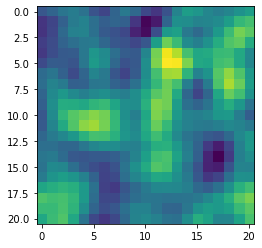

In [21]:
plt.imshow(fields_check[0,:,:])

In [22]:
fields_check[1,0,0]

-0.16706751845794254

In [23]:
np.reshape(fields_save,(100,21,21))

array([[[-1.18380423, -0.86776158, -0.46540459, ..., -0.04772473,
          0.29137478,  0.56527275],
        [-1.90353894, -1.5660028 , -0.94266977, ...,  0.56747624,
          1.23876955,  1.47533624],
        [-1.92225039, -1.54049866, -0.74787135, ...,  1.33336213,
          2.01347182,  1.71911967],
        ...,
        [ 1.57222411,  1.41759887,  1.49709509, ...,  1.03296194,
          1.71074464,  2.02830884],
        [ 1.32757171,  1.28799572,  1.52248456, ...,  0.66949622,
          1.31028119,  1.7136579 ],
        [ 0.82328977,  1.3437438 ,  1.61791607, ..., -0.01888637,
          0.72859884,  1.50612733]],

       [[-0.16706752, -0.93510329, -0.80108121, ..., -1.5887377 ,
         -1.67029152, -1.16469168],
        [ 0.08983613, -0.99898525, -1.18548955, ..., -0.92716115,
         -0.8387372 , -0.29413148],
        [ 0.45305912, -0.19376325, -0.61579537, ..., -0.41318365,
         -0.27208517,  0.18577472],
        ...,
        [ 0.15407215, -1.09997398, -1.72529788, ...,  

In [11]:
np.savetxt("k_array.txt",fields_save)